In [1]:
%load_ext autoreload
%autoreload

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from data_utils import get_training, get_testing, HEADER

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as Forest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from validation import Validation

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from my_pca import my_pca

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

%matplotlib notebook

In [2]:
models = [
    (30, BaggingClassifier(LogisticRegression(penalty='l1', C=10))),
    (5, Forest(n_estimators=250, max_features="sqrt")),
    (10, KNeighborsClassifier(n_neighbors=3)),
    (30, LinearDiscriminantAnalysis()),
    (30, QuadraticDiscriminantAnalysis()),
    (30, LogisticRegression(penalty='l1', C=10))
]

X_train, y_train = get_training()
X_test, y_test = get_testing()

results = np.zeros((len(models), 3))
confusions = []

for i, (comp, mdl) in enumerate(models):
    # normalize
    s = StandardScaler()
    X_train_n = s.fit_transform(X_train);
    X_test_n = s.transform(X_test);

    # pca
    pca = PCA(n_components=comp)
    # find components on train
    X_train_pca = pca.fit_transform(X_train_n)
    # transform test on train
    X_test_pca = pca.transform(X_test_n)
    
    # fit model
    mdl.fit(X_train_pca, y_train)
    y_pred = mdl.predict(X_test_pca)
    
    # metrics
    results[i,0] = accuracy_score(y_test, y_pred)
    results[i,1] = recall_score(y_test, y_pred)
    results[i,2] = precision_score(y_test, y_pred)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusions.append(cm)

<IPython.core.display.Javascript object>


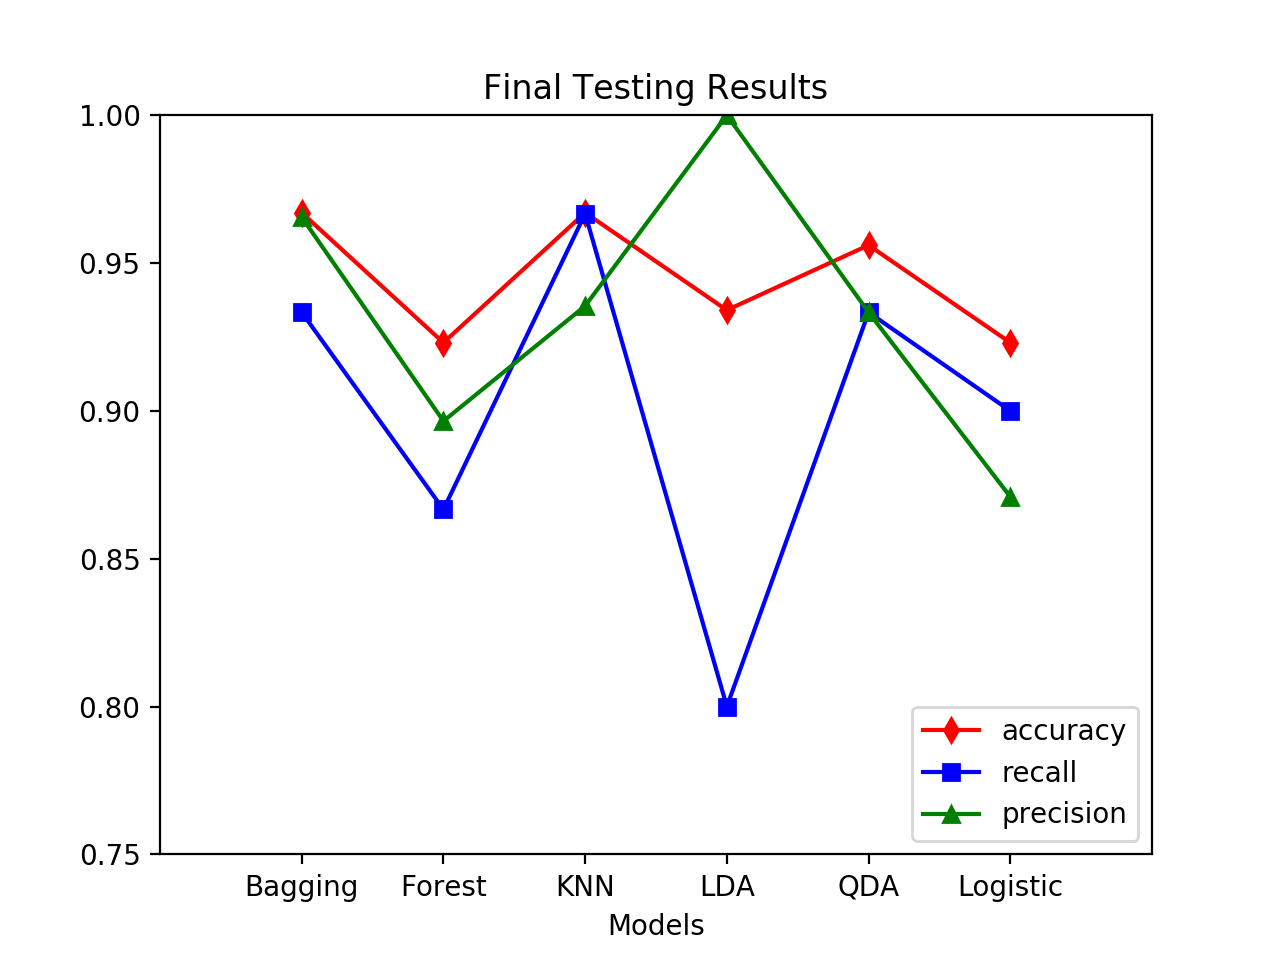

In [3]:
model_names = [
    'Bagging', 'Forest', 'KNN', 'LDA', 'QDA', 'Logistic'
]
x = range(0, len(model_names))
plt.close()
lines = plt.plot(x, results[:,0], 'rd-', x, results[:,1], 'bs-', x, results[:,2], 'g^-')
plt.legend(lines, ('accuracy','recall','precision'),loc='lower right')
plt.title('Final Testing Results')
plt.xlabel('Models')
plt.xticks(x, model_names)
axes = plt.gca()
axes.set_xlim([-1,6])
axes.set_ylim([0.75,1.0])
plt.show()

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f'%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>


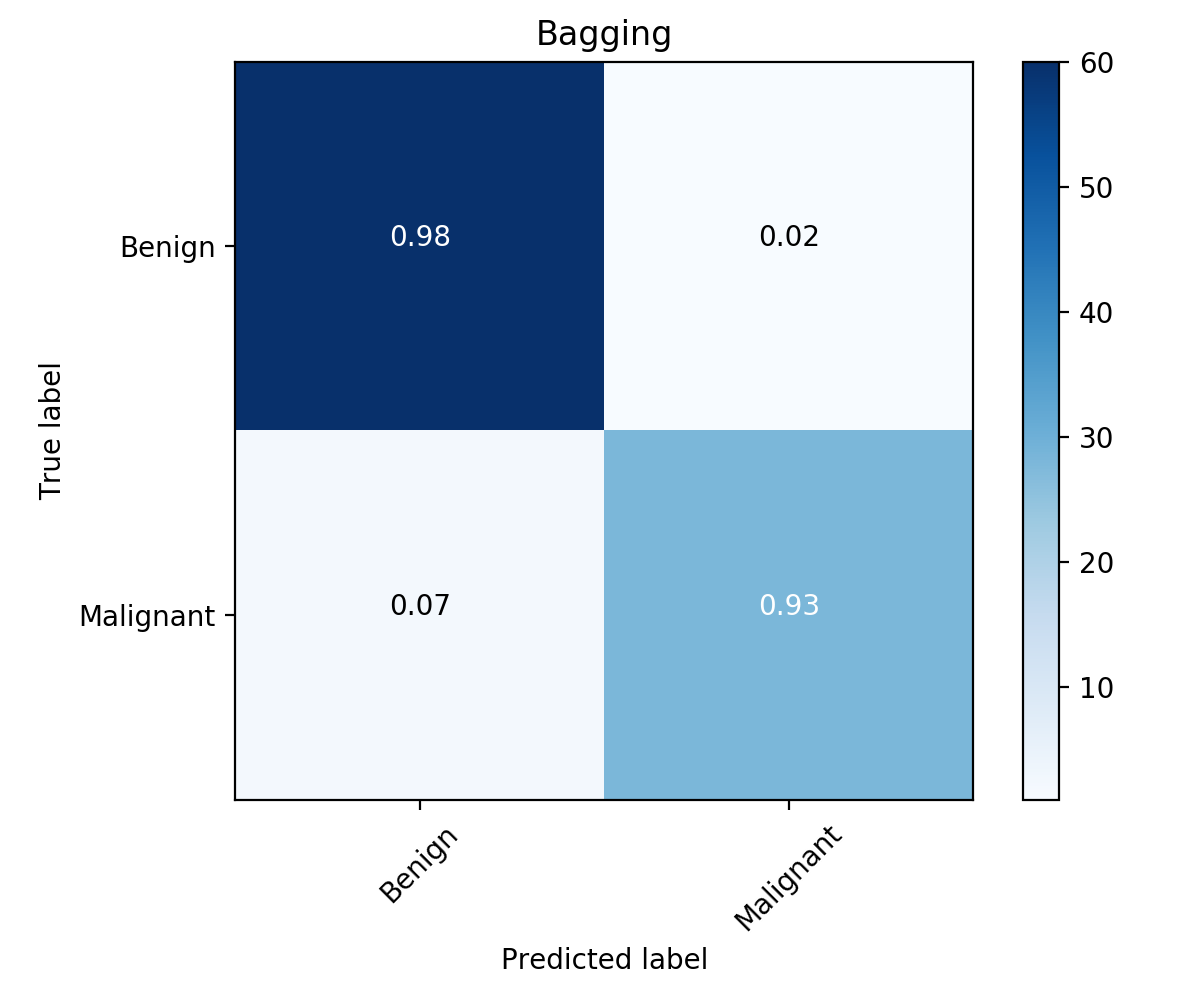

Normalized confusion matrix


In [10]:
i = 0
cm = confusions[i]
plt.figure(figsize=(6,5))
plot_confusion_matrix(cm, classes=['Benign', 'Malignant'], normalize=True, title=model_names[i])

In [22]:
print results

[[ 0.96703297  0.93333333  0.96551724]
 [ 0.9010989   0.86666667  0.83870968]
 [ 0.96703297  0.96666667  0.93548387]
 [ 0.93406593  0.8         1.        ]
 [ 0.95604396  0.93333333  0.93333333]
 [ 0.92307692  0.9         0.87096774]]
